### Object Recognition using Python , OpenCv and YOLO

<p>Object Recognition is a technology that lies under the broader domain of Computer Vision. This technology is capable of identifying objects that exist in images and videos and tracking them. Object Recognition also known as Object Detection, has various applications like face recognition, vehicle recognition, pedestrian counting, self-driving vehicles, security systems, and a lot more.</p>

#### Group Members

<ol>
    <li>Qadir Hassan </li>
     <li>S.M Hussain</li>
     <li>Munuwar Hussain</li>
     <li>Nisar Hussain</li>
     <li>Fiaza  </li>
     <li>Khadija Batool</li>
     <li>Farman Ali</li>
    </ol>

### Importing the required Library files 

In [1]:
import cv2
from cv2 import VideoCapture
from cv2 import waitKey

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = []
file_name = 'Lables.txt'
with open (file_name,'rt') as fpt:
           classLabels = fpt.read (). rstrip("\n").split ('\n')
#classLables. oppend (fpt.read() )

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
# define the config of for these object detection, its already predefine for mobile net you need to just write
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)#255/1=127.5
model.setInputMean((127.5, 127.5,127.5))#mobilenet=>[-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000001C21FD553D0>

# Read An Image

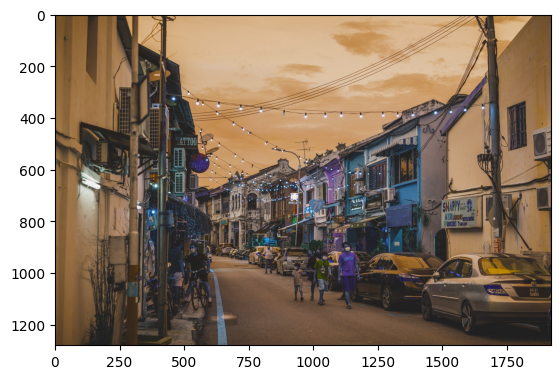

In [9]:
img = cv2.imread("8.jpg")
plt.imshow(img)

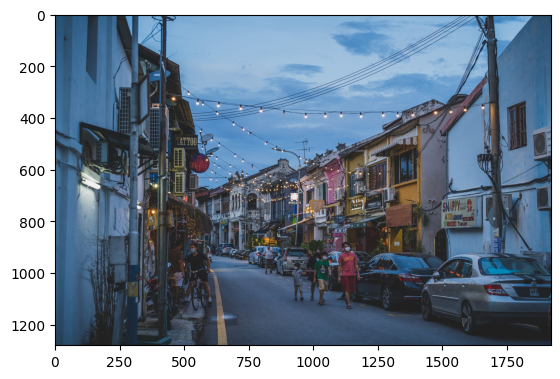

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidece, bbox=model.detect(img, confThreshold=0.5)

In [12]:
# define the bounding box and format 
font_scale = 3

font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y),(x+w , y+h),(255,0,0),2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness=1)
    cv2.rectangle(img, boxes,(215, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1] , (boxes[0]+10,boxes[1]+40) , font, fontScale = font_scale, color = (0,255,0), thickness=3)


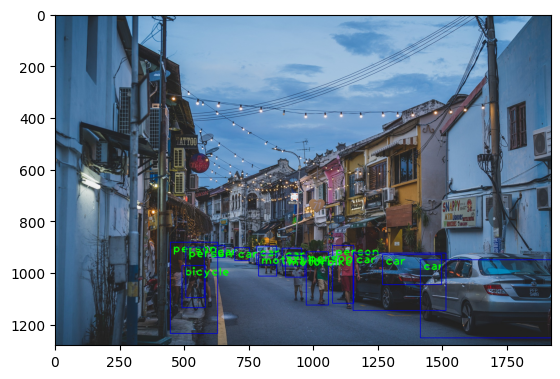

In [13]:
# lets show now 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video or Webcam

In [ ]:
cap= cv2.VideoCapture(0)

#Check if the video is opened correctly
if not cap.isOpened ():
    cap = cv2.VideoCapture(0)
if not cap.isOpened ():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox=model.detect(frame, confThreshold=0.55)
   
   
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                cv2.putText(frame,classLabels [ClassInd -1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0),thickness=3)
            



    cv2.imshow("Object Detection Tutorial",frame)
    if cv2.waitKey (2) & 0xFF == ord('q'):
               break
cap.release()
cv2.destroyAllwindows()